## Exercise 4-1 & 4-2
### Taniya Adhikari
#### DSC530


In [32]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

load the data from the NSFG.

In [33]:
live, firsts, others = first.MakeFrames()

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [34]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [35]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [36]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

## Exercises

**Exercise 4-1:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

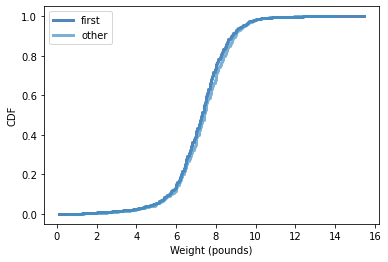

In [37]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [38]:
other_cdf.PercentileRank(9)

91.8716577540107

I was at the 91.8 ~ 92th percentile.

**Exercise 4-2:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [39]:
data = np.random.random(1000)

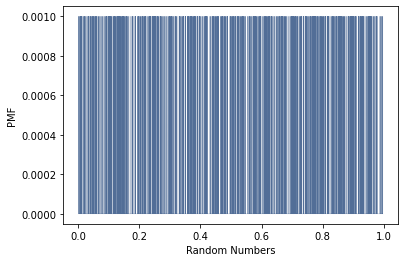

In [40]:
pmf = thinkstats2.Pmf(data)
thinkplot.Pmf(pmf, linewidth=0.2)
thinkplot.Config(xlabel='Random Numbers', ylabel='PMF')

PMF is better for small sample, we are using n = 1000, the PMF is hard to read for larger data, it has too much noise

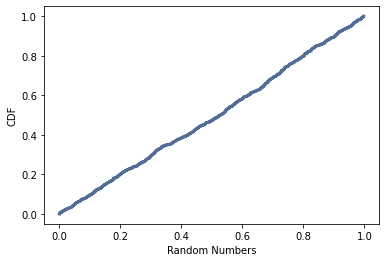

In [29]:
cdf = thinkstats2.Cdf(data)
thinkplot.cdf(cdf)
thinkplot.Config(xlabel='Random Numbers', ylabel='CDF')

The CDF plot is the straight line meaning it is a uniform distribution, and each number has the same probability